In [215]:
# Importing required librabries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [216]:
data = pd.read_csv('netflix.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<Axes: >

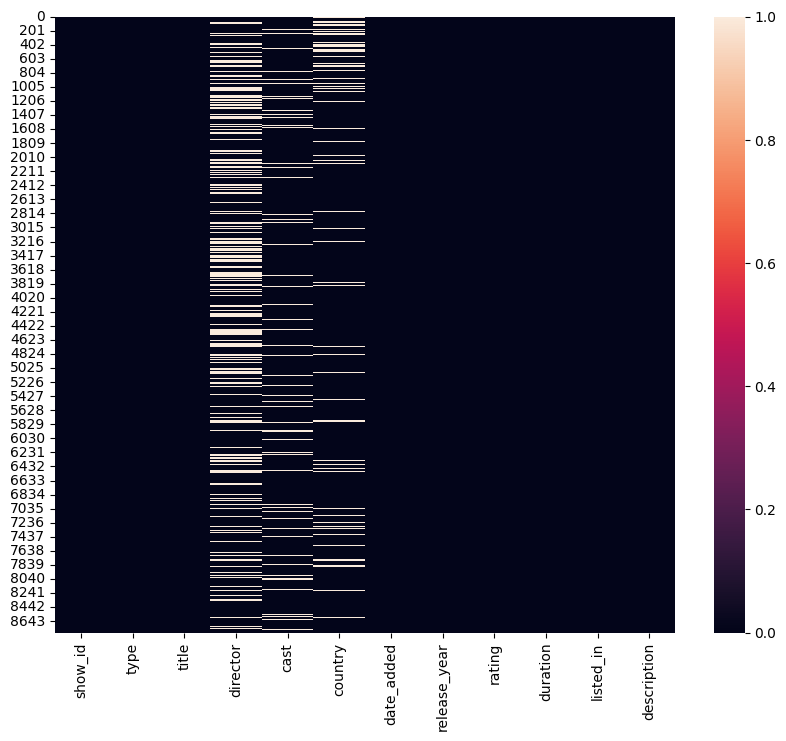

In [217]:
#Checking the null values
plt.figure(figsize=(10,8))
sns.heatmap(data.isna())


The Director, Cast, and Country fields in many of the data records are incomplete. The primary objective is to identify which television series and films performed the best, with the aim of increasing Netflix's revenue. The analysis begins by examining the distribution of the number of TV series and films available on Netflix. Subsequently, further details about those that received the highest ratings will be explored.

<Axes: xlabel='type', ylabel='count'>

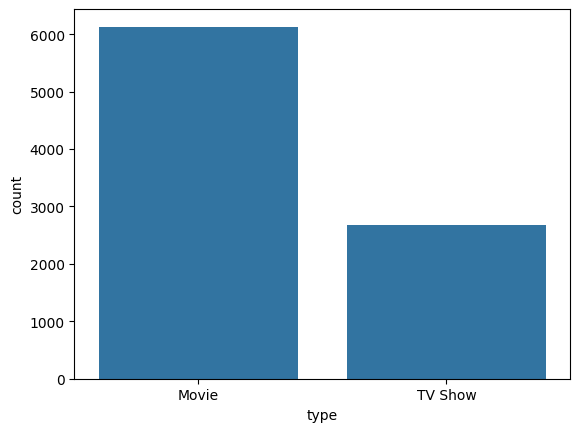

In [218]:
sns.countplot(x= 'type', data=data)

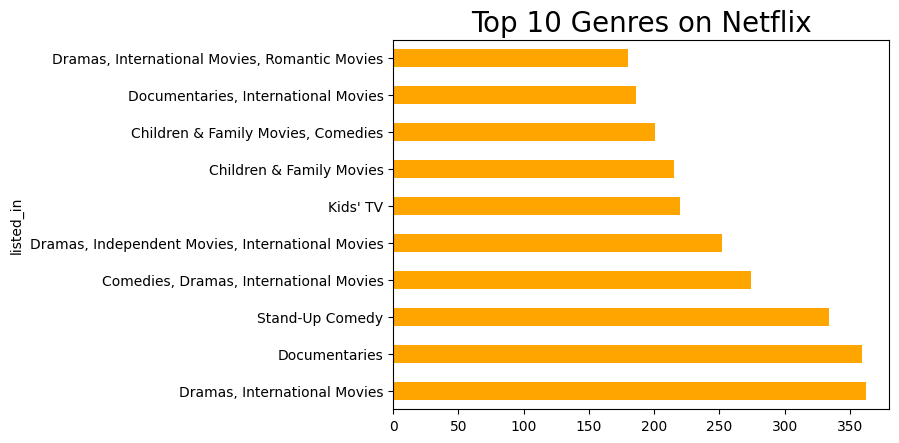

In [219]:
# plt.figure(figsize=(22,10))
data["listed_in"].value_counts()[:10].plot(kind="barh", color="orange")
plt.title("Top 10 Genres on Netflix",size=20);

There are significantly more movies compared to TV shows in the dataset. Therefore, the data will be split to ensure that the analysis remains unbiased. Prior to this, the data needs to be cleaned and preprocessed to obtain better insights.

# **ANALYSIS FOR MOVIES**

In [220]:
movies = data.copy()
movies = movies[movies['type'] == 'Movie']

movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


As the Director and Cast columns contain limited values, they will be dropped from the dataset. However, the Country column will be retained, as it is one of the primary attributes for this case study.

In [221]:
movies.drop(['director', 'cast'], axis=1, inplace=True)
movies.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,"Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [222]:
movies[movies['country'].isnull()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
6,s7,Movie,My Little Pony: A New Generation,NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
13,s14,Movie,Confessions of an Invisible Girl,NaN,"September 22, 2021",2021,TV-PG,91 min,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,NaN,"September 22, 2021",2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...
18,s19,Movie,Intrusion,NaN,"September 22, 2021",2021,TV-14,94 min,Thrillers,After a deadly home invasion at a couple’s new...
22,s23,Movie,Avvai Shanmughi,NaN,"September 21, 2021",1996,TV-PG,161 min,"Comedies, International Movies",Newly divorced and denied visitation rights wi...
...,...,...,...,...,...,...,...,...,...,...
8585,s8586,Movie,Three-Quarters Decent,NaN,"June 20, 2019",2010,TV-14,96 min,"Comedies, Dramas, International Movies","Determined to fight corruption in his country,..."
8602,s8603,Movie,Tom and Jerry: The Magic Ring,NaN,"December 15, 2019",2001,TV-Y7,60 min,"Children & Family Movies, Comedies",When a young wizard leaves Tom to guard his pr...
8622,s8623,Movie,Tremors 2: Aftershocks,NaN,"January 1, 2020",1995,PG-13,100 min,"Comedies, Horror Movies, Sci-Fi & Fantasy",A rag-tag team of survivalists and scientists ...
8718,s8719,Movie,Westside vs. the World,NaN,"August 9, 2019",2019,TV-MA,96 min,"Documentaries, Sports Movies",A look into the journey of influential strengt...


In [223]:
movies['country'] = movies['country'].ffill(axis=0)
movies[movies['country'].isnull()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description


In [224]:
# Checking for null rated movies
movies[movies['rating'].isnull()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,United States,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
7537,s7538,Movie,My Honor Was Loyalty,Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


Given the small number of missing values, filling them manually using information available online is a practical and efficient approach.

In [225]:
# Defining the missing values manually
movies.loc[5989, 'rating'] = 'TV-PG'
movies.loc[7537, 'rating'] = 'TV-MA'

In [226]:
movies[movies['rating'].isnull()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description


As observed, the Country column contains multiple values representing the countries where the content was displayed. Assuming that the first country listed is the primary source of the content, it will be used for further analysis.

In [227]:
movies['primary_country'] = movies['country'].apply(lambda x: x.split(',')[0])
movies

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,primary_country
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",United States
6,s7,Movie,My Little Pony: A New Generation,United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,United States
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",United States
9,s10,Movie,The Starling,United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,United States
12,s13,Movie,Je Suis Karl,"Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,Germany
...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,"United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,United Arab Emirates
8802,s8803,Movie,Zodiac,United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",United States
8804,s8805,Movie,Zombieland,United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,United States
8805,s8806,Movie,Zoom,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",United States


The analysis for the problem statement will begin by dividing the data based on the top 10 main countries identified. The data will then be grouped by genres and ratings. This approach will provide insights into which types of content received the best reviews in each country, based on the top genres. With this information, the development of similar content can be promoted in the future.

In [228]:
# Top 10 countries with maximum content
top_countries = movies.groupby('primary_country').count().sort_values('type', ascending=False)[:10]
top_countries

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
primary_country,,,,,,,,,,
United States,2541,2541,2541,2541,2541,2541,2541,2538,2541,2541
India,998,998,998,998,998,998,998,998,998,998
United Kingdom,410,410,410,410,410,410,410,410,410,410
Canada,196,196,196,196,196,196,196,196,196,196
France,159,159,159,159,159,159,159,159,159,159
Spain,133,133,133,133,133,133,133,133,133,133
Nigeria,111,111,111,111,111,111,111,111,111,111
Egypt,106,106,106,106,106,106,106,106,106,106
Mexico,95,95,95,95,95,95,95,95,95,95


In [229]:
# Top 10 genres with maximum content
top_genres = movies.groupby('listed_in').count().sort_values('type', ascending=False)[:10]
top_genres

,show_id,type,title,country,date_added,release_year,rating,duration,description,primary_country
listed_in,,,,,,,,,,
"Dramas, International Movies",362,362,362,362,362,362,362,362,362,362
Documentaries,359,359,359,359,359,359,359,359,359,359
Stand-Up Comedy,334,334,334,334,334,334,334,334,334,334
"Comedies, Dramas, International Movies",274,274,274,274,274,274,274,274,274,274
"Dramas, Independent Movies, International Movies",252,252,252,252,252,252,252,252,252,252
Children & Family Movies,215,215,215,215,215,215,215,215,215,215
"Children & Family Movies, Comedies",201,201,201,201,201,201,201,201,201,201
"Documentaries, International Movies",186,186,186,186,186,186,186,186,186,186
"Dramas, International Movies, Romantic Movies",180,180,180,180,180,180,180,180,180,180


In [230]:
# Filtering the data for top 10 genres

movies = movies[movies['listed_in'].isin(list(top_genres.index))]

# Filtering the data for top 10 countries

movies = movies[movies['primary_country'].isin(list(top_countries.index))]
movies

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,primary_country
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",United States
6,s7,Movie,My Little Pony: A New Generation,United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,United States
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",United States
30,s31,Movie,Ankahi Kahaniya,"United States, India, France","September 17, 2021",2021,TV-14,111 min,"Dramas, Independent Movies, International Movies","As big city life buzzes around them, lonely so...",United States
45,s46,Movie,My Heroes Were Cowboys,United States,"September 16, 2021",2021,PG,23 min,Documentaries,Robin Wiltshire's painful childhood was rescue...,United States
...,...,...,...,...,...,...,...,...,...,...,...
8793,s8794,Movie,"Yours, Mine and Ours",United States,"November 20, 2019",2005,PG,88 min,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...,United States
8794,s8795,Movie,اشتباك,"Egypt, France","October 11, 2018",2016,TV-14,98 min,"Dramas, Independent Movies, International Movies",Amid the tumult following Egyptian President M...,Egypt
8798,s8799,Movie,Zed Plus,India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...,India
8799,s8800,Movie,Zenda,India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...,India


In [231]:
ratings=[]
for rate in movies['rating'].unique():
  ratings.append(rate)

countries = movies['primary_country'].unique()

listing = movies['listed_in'].unique()

# The top content based on genres and the highest ratings within each genre across different countries.

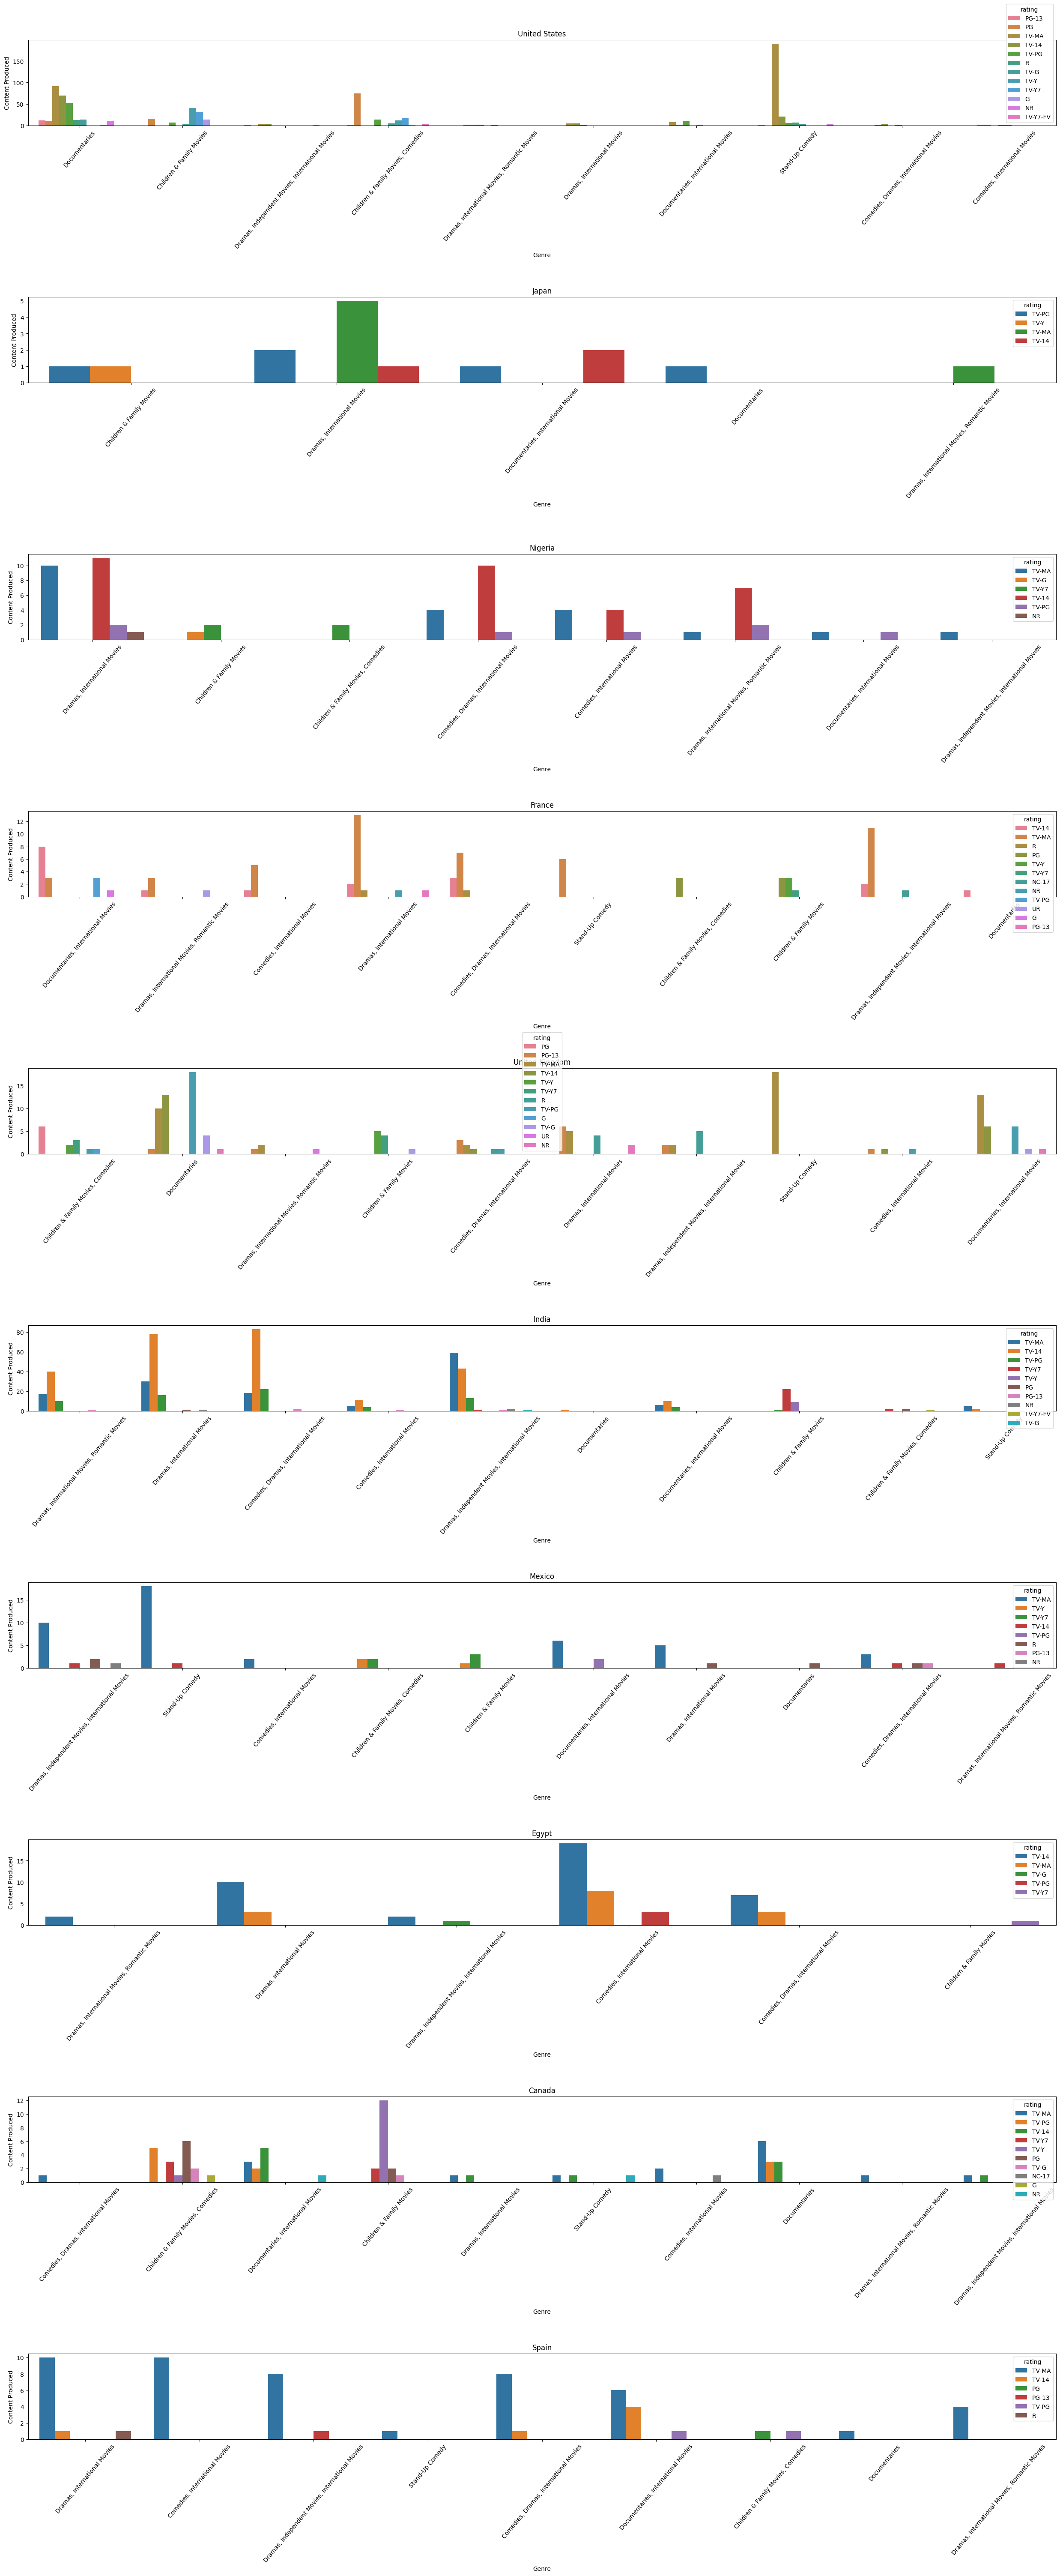

In [232]:
fig = plt.figure(figsize=(30,40))

for i, name in enumerate(countries):
  frame = movies[movies['primary_country'] == str(name)]
  ax = fig.add_subplot(len(countries),1,i+1)
  topic = name
  sns.countplot(x='listed_in', data= frame[frame['listed_in'].isin(listing)], hue='rating')
  ax.set_title(topic)
  plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.5,
                    wspace=0.5,
                    hspace=2.0)
  plt.xlabel('Genre')
  plt.xticks(rotation = 50)
  ax.set(ylabel='Content Produced')

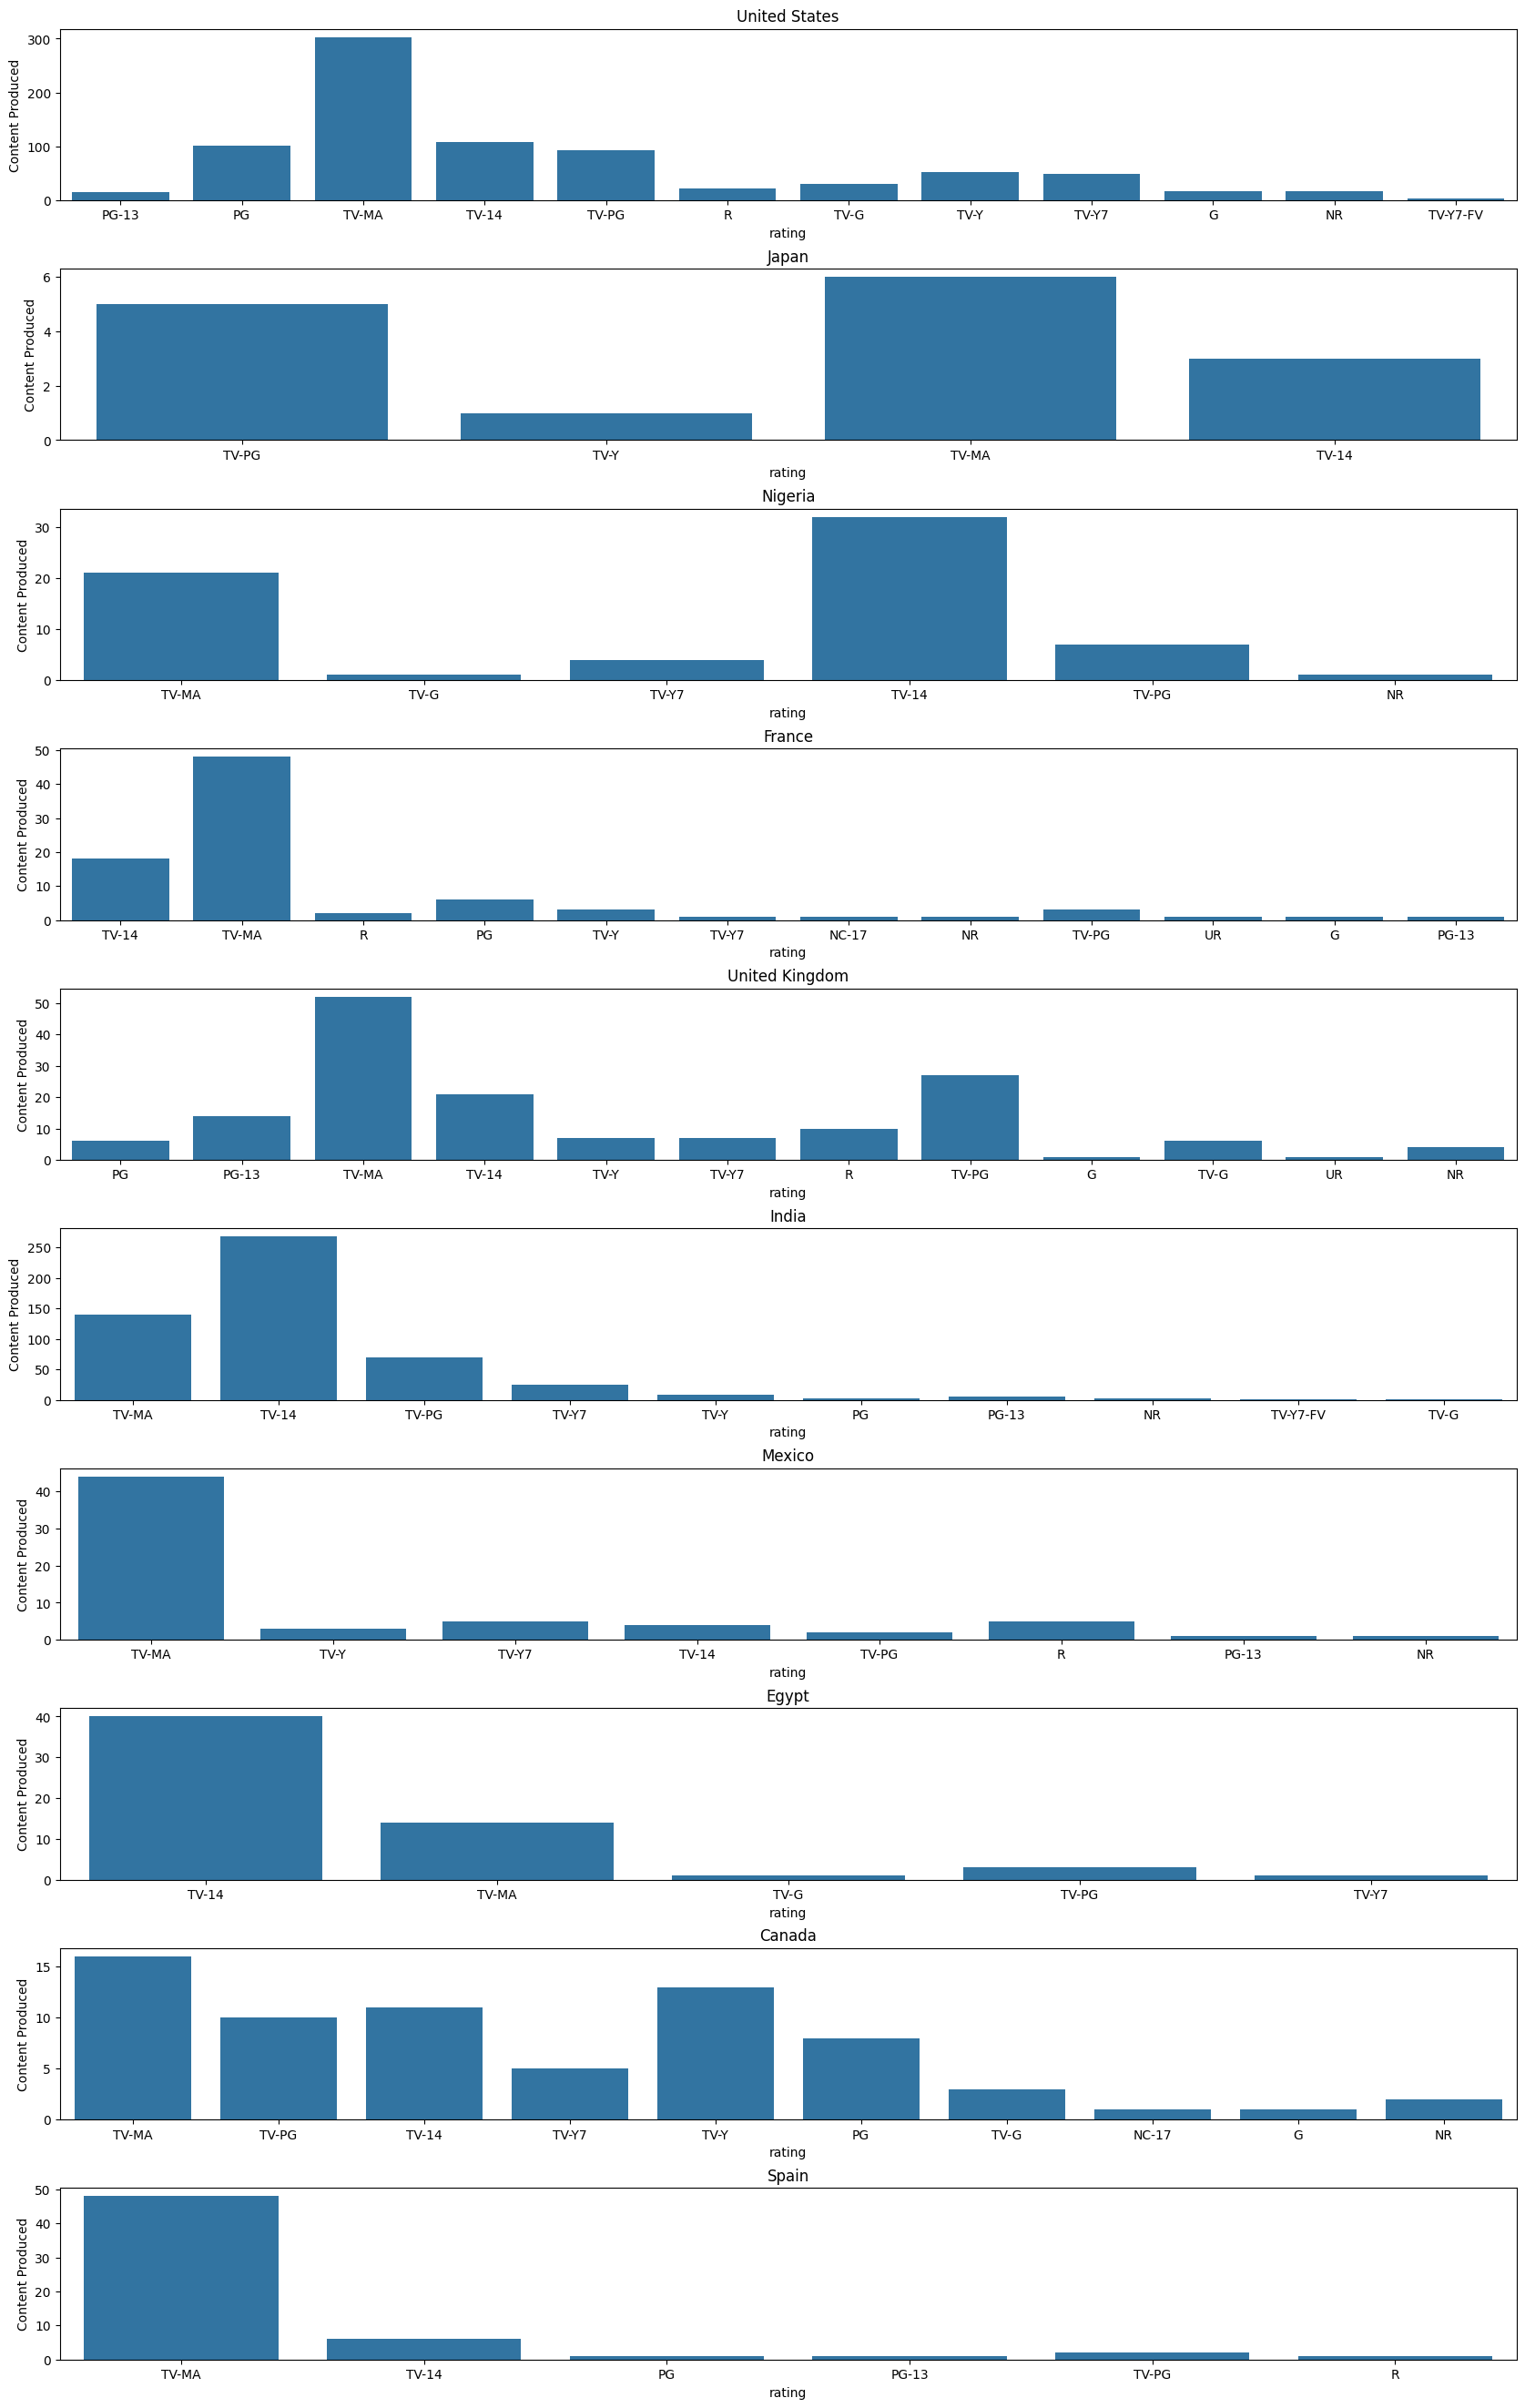

In [233]:
fig0 = plt.figure(figsize=(20,32))

for i, name in enumerate(countries):
  frame = movies[movies['primary_country'] == str(name)]
  ax = fig0.add_subplot(len(countries),1,i+1)
  topic = name
  sns.countplot(x='rating', data= frame[frame['rating'].isin(ratings)])
  ax.set_title(topic)
  plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
  ax.set(ylabel='Content Produced')

The graph above clearly illustrates the types of content and ratings that are most appealing to audiences in the top 10 countries.

Note: The top 10 genres were selected for displaying this data.

**All the steps and analysis done for Movies is repeated for TV Shows as well and conclusions are drawn from them on a similar basis**

# ANALYSIS ON TV SHOWS

In [234]:
tv = data.copy()
tv = tv[tv['type'] == 'TV Show']

tv.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [235]:
tv.drop(['director', 'cast'], axis=1, inplace=True)
tv.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [236]:
tv[tv['country'].isnull()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
5,s6,TV Show,Midnight Mass,NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
11,s12,TV Show,Bangkok Breaking,NaN,"September 23, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ..."
...,...,...,...,...,...,...,...,...,...,...
8679,s8680,TV Show,ViR: The Robot Boy,NaN,"March 31, 2018",2013,TV-Y7,2 Seasons,Kids' TV,Humanoid robot boy ViR lives with his inventor...
8690,s8691,TV Show,Wake Up,NaN,"March 31, 2018",2017,TV-14,2 Seasons,"International TV Shows, TV Dramas","After taking the blame for a patient death, an..."
8783,s8784,TV Show,Yoko,NaN,"June 23, 2018",2016,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b..."
8785,s8786,TV Show,YOM,NaN,"June 7, 2018",2016,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o..."


In [237]:
tv['country'] = tv['country'].ffill(axis=0)
tv[tv['country'].isnull()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description


In [238]:
tv[tv['rating'].isnull()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
6827,s6828,TV Show,Gargantia on the Verdurous Planet,Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."


In [239]:
tv.loc[6827, 'rating'] = 'TV-14'
tv.loc[7312, 'rating'] = 'TV-MA'

In [240]:
tv[tv['rating'].isna()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description


In [241]:
tv['primary_country'] = tv['country'].apply(lambda x: x.split(',')[0])
tv

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,primary_country
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa
2,s3,TV Show,Ganglands,South Africa,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,South Africa
3,s4,TV Show,Jailbirds New Orleans,South Africa,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",South Africa
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,India
5,s6,TV Show,Midnight Mass,India,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,India
...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,"Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,Japan
8796,s8797,TV Show,Yunus Emre,Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",Turkey
8797,s8798,TV Show,Zak Storm,"United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,United States
8800,s8801,TV Show,Zindagi Gulzar Hai,Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",Pakistan


In [242]:
# Top 10 countries with maximum TV content
top_countries_tv = tv.groupby('primary_country').count().sort_values('type', ascending=False)[:10]
top_countries_tv

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
primary_country,,,,,,,,,,
United States,996,996,996,996,990,996,996,996,996,996
United Kingdom,282,282,282,282,281,282,282,282,282,282
Japan,195,195,195,195,194,195,195,195,195,195
South Korea,194,194,194,194,194,194,194,194,194,194
India,102,102,102,102,101,102,102,102,102,102
Canada,99,99,99,99,99,99,99,99,99,99
Taiwan,80,80,80,80,80,80,80,80,80,80
France,79,79,79,79,79,79,79,79,79,79
Australia,66,66,66,66,65,66,66,66,66,66


In [243]:
# Top 10 genres with maximum TV content
top_genres_tv = tv.groupby('listed_in').count().sort_values('type', ascending=False)[:10]
top_genres_tv

,show_id,type,title,country,date_added,release_year,rating,duration,description,primary_country
listed_in,,,,,,,,,,
Kids' TV,220,220,220,220,219,220,220,220,220,220
"International TV Shows, TV Dramas",121,121,121,121,121,121,121,121,121,121
"Crime TV Shows, International TV Shows, TV Dramas",110,110,110,110,110,110,110,110,110,110
"Kids' TV, TV Comedies",99,99,99,99,98,99,99,99,99,99
Reality TV,95,95,95,95,95,95,95,95,95,95
"International TV Shows, Romantic TV Shows, TV Comedies",94,94,94,94,94,94,94,94,94,94
"International TV Shows, Romantic TV Shows, TV Dramas",90,90,90,90,90,90,90,90,90,90
"Anime Series, International TV Shows",88,88,88,88,88,88,88,88,88,88
Docuseries,85,85,85,85,84,85,85,85,85,85


In [244]:
# Filtering the data for top 10 genres

tv = tv[tv['listed_in'].isin(list(top_genres_tv.index))]


# Filtering the data for top 10 countries

tv = tv[tv['primary_country'].isin(list(top_countries_tv.index))]

In [245]:
ratings1=[]
for rate in tv['rating'].unique():
  ratings1.append(rate)

countries1 = tv['primary_country'].unique()

listing1 = tv['listed_in'].unique()


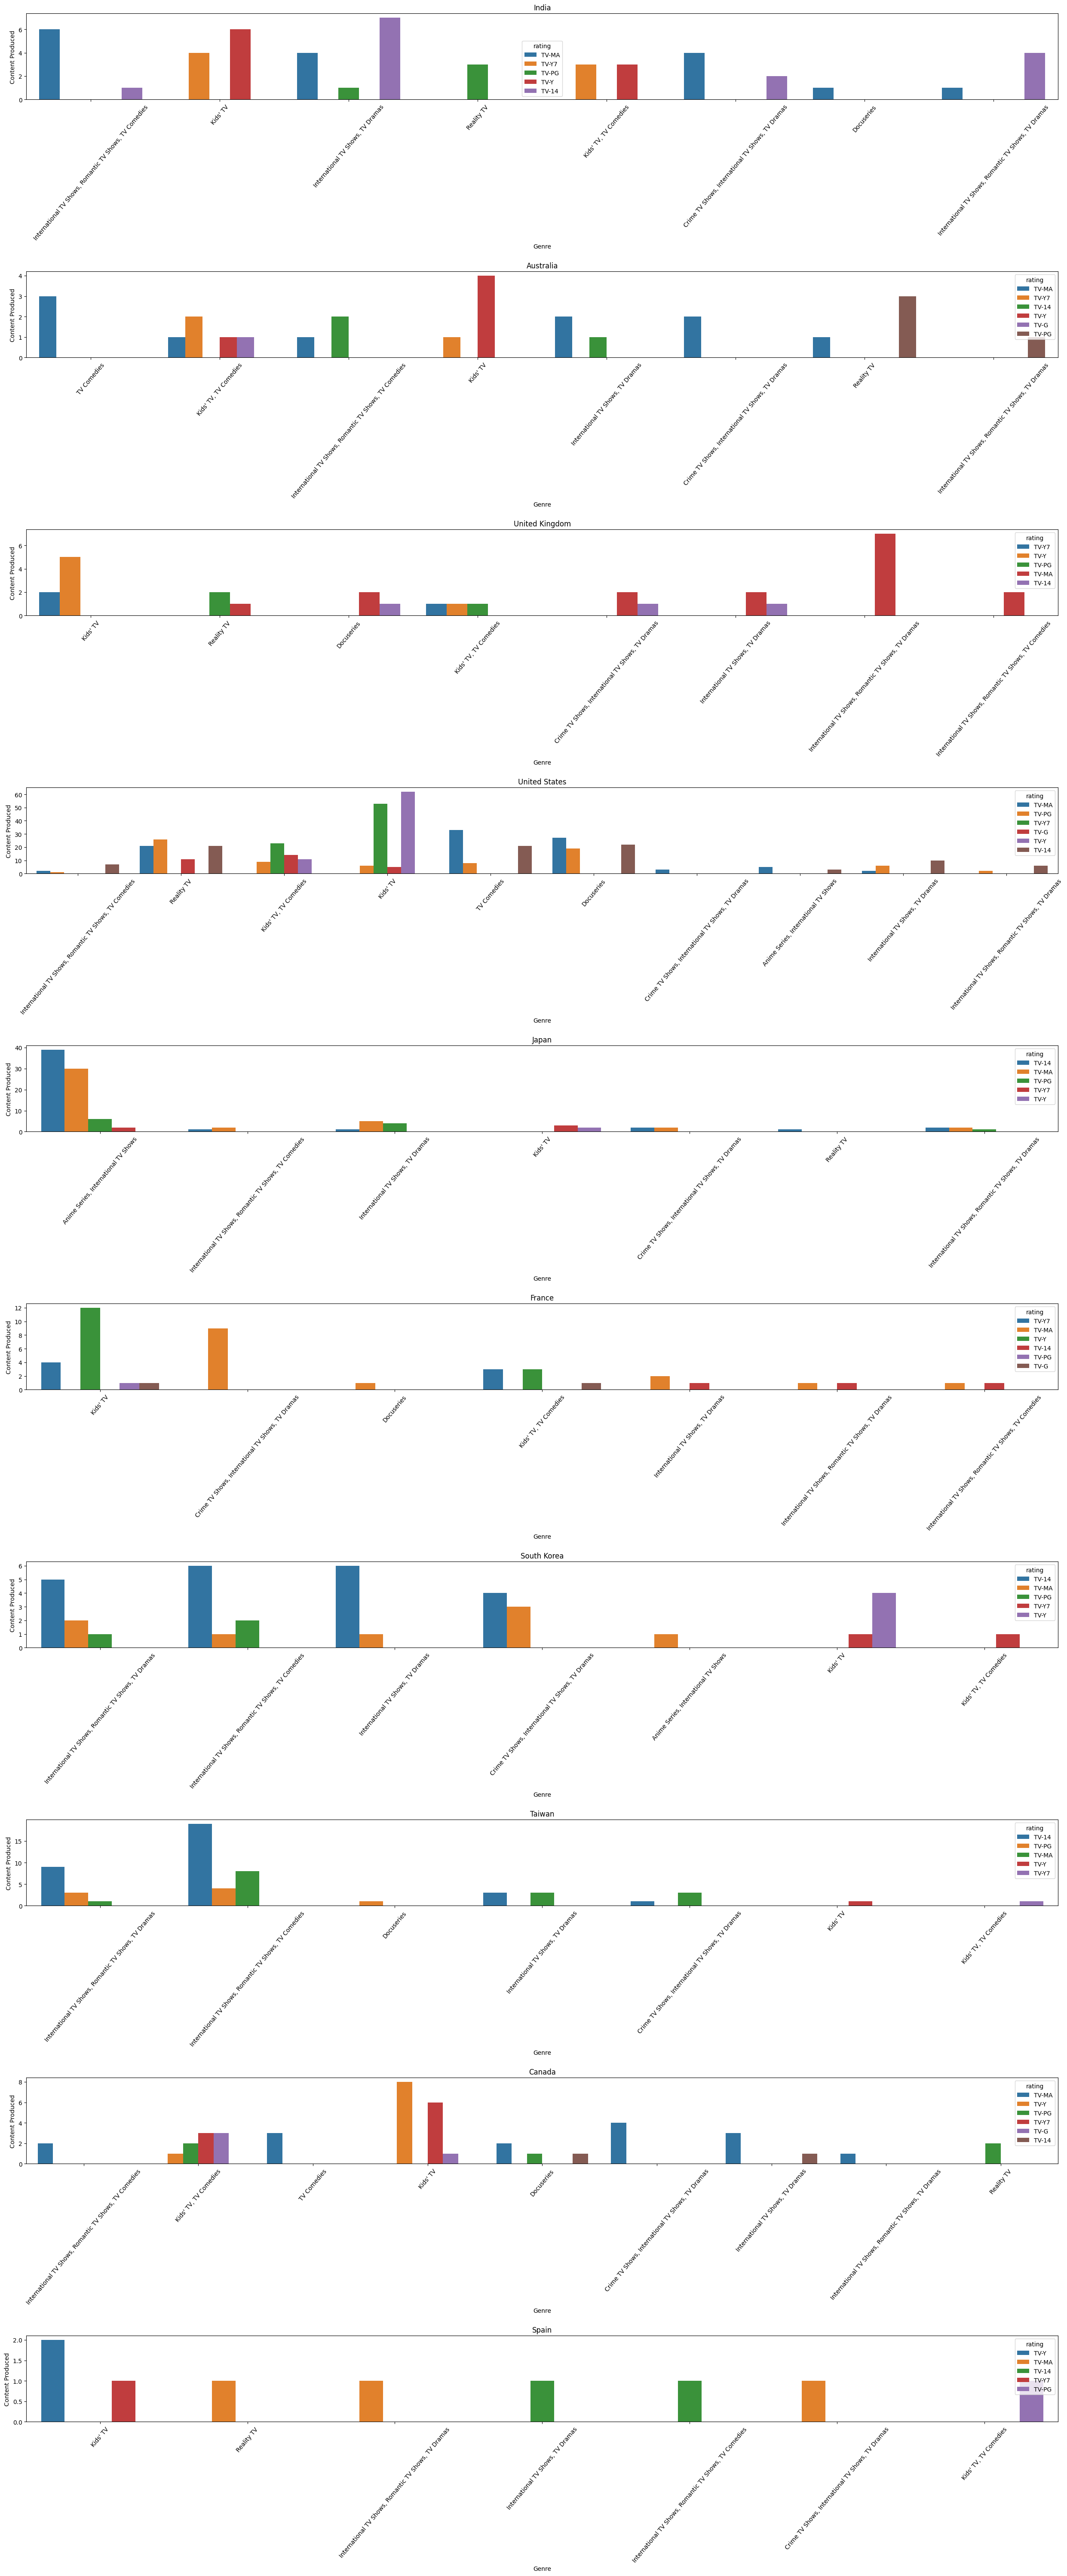

In [246]:
fig1 = plt.figure(figsize=(30,40))

for i, name in enumerate(countries1):
  frame = tv[tv['primary_country'] == str(name)]
  ax = fig1.add_subplot(len(countries1),1,i+1)
  topic = name
  sns.countplot(x='listed_in', data= frame[frame['listed_in'].isin(listing1)], hue='rating')
  ax.set_title(topic)
  plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.5,
                    wspace=0.5,
                    hspace=2.0)
  plt.xlabel('Genre')
  plt.xticks(rotation = 50)
  ax.set(ylabel='Content Produced')

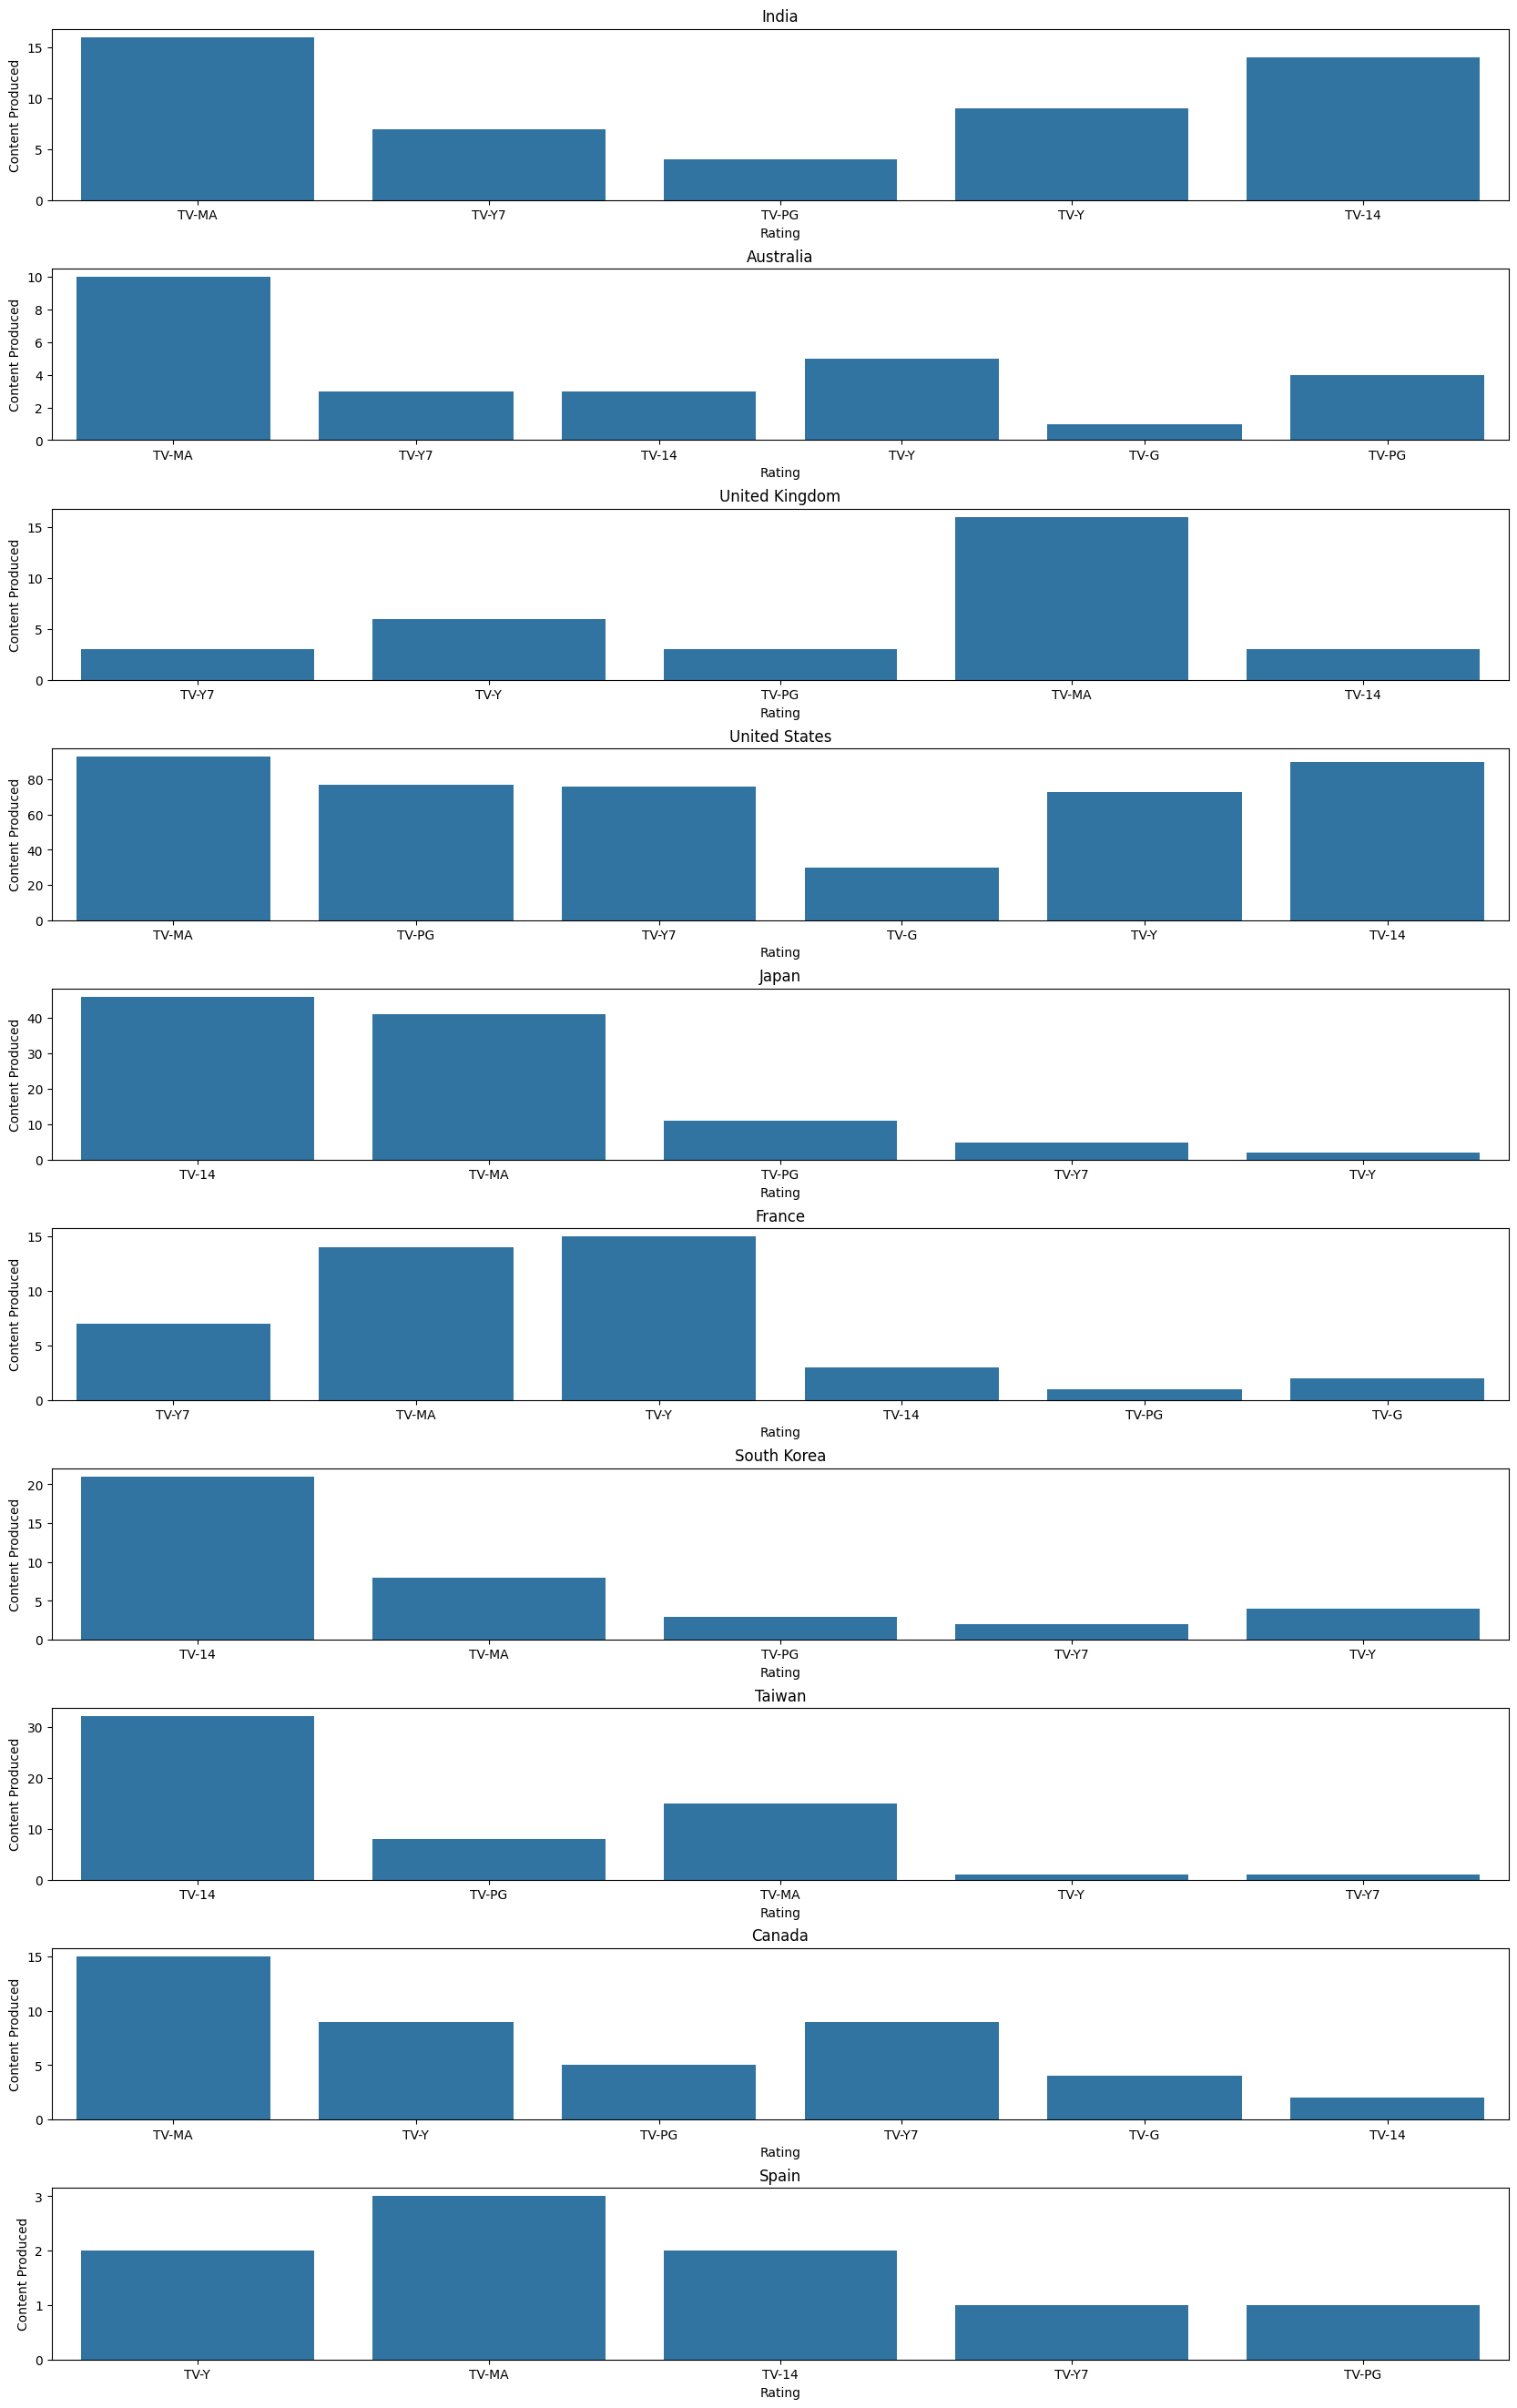

In [247]:
fig2 = plt.figure(
    figsize=(20,32)
    )

for i, name in enumerate(countries1):
  frame = tv[tv['primary_country'] == str(name)]
  ax = fig2.add_subplot(len(countries1),1,i+1)
  topic = name
  sns.countplot(x='rating', data= frame[frame['rating'].isin(ratings1)])
  ax.set_title(topic)
  plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
  plt.xlabel('Rating')
  ax.set(ylabel='Content Produced')